In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import random
import plotly.graph_objs as go
#import plotly.offline as py
#py.init_notebook_mode(connected=True)


from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

In [28]:
n = 3000000 #number of records in file
s = 30000 #desired sample size
filename = "../Data/amazon_review_full_csv/train.csv"
skip = sorted(random.sample(range(n),n-s))

data_df = pd.read_csv(filename, header=None,skiprows=skip)

In [29]:
data_df.head()

,0,1,2
0,1,"Don't buy from Eforcity -- slow, disingenuous",What am I reviewing here... this gizmo or the ...
1,4,Nice Thomas Sampler,Marking the 10th Anniversary of Thomas videos ...
2,2,Wrong item sent.,I got the shippment quickly. But wrong items w...
3,3,Riveting!,Don't let the first quarter of this book disco...
4,1,Negative Stars! Avoid like flesh eating bacteria!,"""Lets jiggel the camera to show that the groun..."


In [30]:
data_df.columns =['Rating','Review Title', 'Review Text']

In [31]:
data_df.head()

,Rating,Review Title,Review Text
0,1,"Don't buy from Eforcity -- slow, disingenuous",What am I reviewing here... this gizmo or the ...
1,4,Nice Thomas Sampler,Marking the 10th Anniversary of Thomas videos ...
2,2,Wrong item sent.,I got the shippment quickly. But wrong items w...
3,3,Riveting!,Don't let the first quarter of this book disco...
4,1,Negative Stars! Avoid like flesh eating bacteria!,"""Lets jiggel the camera to show that the groun..."


In [32]:
data_df.shape

(30000, 3)

In [33]:
data_df['Rating'].nunique()

5

(array([ 0.51175   ,  0.        ,  0.50408333,  0.        ,  0.        ,
         0.49066667,  0.        ,  0.50033333,  0.        ,  0.49316667]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

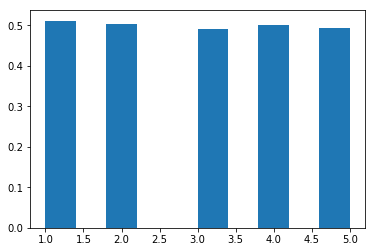

In [34]:
plt.hist(data_df['Rating'], align='mid', normed=1)

In [35]:
# Converting rating into Binary class
data_df['Rating']= data_df['Rating'].replace([1,2],0)
data_df['Rating']= data_df['Rating'].replace([3,4,5],1)

(array([ 12190.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17810.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

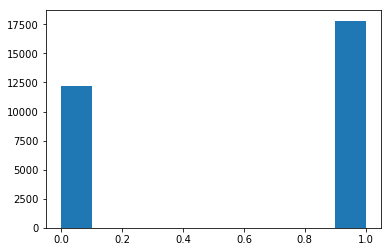

In [36]:
plt.hist(data_df['Rating'], align='mid')


## Data Preparation

In [37]:
def reviews_to_words (raw_reviews):
    
    # Remove the HTML characters
    reviews_text = BeautifulSoup(raw_reviews)
    
    # Remove the punctuals
    letters_only = re.sub("[^a-zA-Z]"," ",reviews_text.get_text())
    
    # Convert it in lower case and split them into words
    lower_case = letters_only.lower()
    words = lower_case.split()
    
    #In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english")) 
    
    meaningfull_words = [w for w in words if not w in stops]
    
    
    #Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningfull_words ))

In [38]:
data_df['Review Text'][100]

'This disc was played everyweekend at our parties, so much so it was almost a ritual. Not quite as good as Love Machine but still an awesome disc.'

In [39]:
# Check one example
reviews_to_words(data_df['Review Text'][100])

/home/rajesh/anaconda2/envs/py36/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/rajesh/anaconda2/envs/py36/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")




'disc played everyweekend parties much almost ritual quite good love machine still awesome disc'

In [40]:
num_reviews= data_df['Review Text'].size

clean_reviews_all= []

for i in range(0, num_reviews):
    # If the index is evenly divisible by 400, print a message
    if( (i+1)%5000 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_reviews))
    
    clean_reviews_all.append(reviews_to_words(data_df['Review Text'][i]))

/home/rajesh/anaconda2/envs/py36/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/rajesh/anaconda2/envs/py36/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")




Review 5000 of 30000

Review 10000 of 30000

Review 15000 of 30000

Review 20000 of 30000

Review 25000 of 30000

Review 30000 of 30000



In [41]:
clean_reviews_all[5]

'read book th grade lit class must admit book quite shock many books read nothing attempt delving inner parts human soul book much depicts struggle man outside enemy commits one unspeakable acts time punishes constantly lacks courage confess crime goes period mental physical torture also faces wrath cruel vicious enemy lives nothing torture victim believe excellent book would reccomend anyone'

In [42]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

clean_reviews_all_1= [[porter_stemmer.stem(word) for word in sentence.split(" ")] for sentence in clean_reviews_all]
clean_reviews_all_1= [" ".join(sentence) for sentence in clean_reviews_all_1]

In [43]:
clean_reviews_all_1[5]

'read book th grade lit class must admit book quit shock mani book read noth attempt delv inner part human soul book much depict struggl man outsid enemi commit one unspeak act time punish constantli lack courag confess crime goe period mental physic tortur also face wrath cruel viciou enemi live noth tortur victim believ excel book would reccomend anyon'

In [44]:
# Creating a corpus of all words

all_text = ''.join([c for c in clean_reviews_all_1])
reviews = all_text.split(',')

all_text = ' '.join(reviews)
words = all_text.split()

### Encoding the words
create dictionaries that map the words in the vocabulary to integers. Then we can convert each of our reviews into integers so they can be passed into the network.

In [45]:
# Create a dictionary for associating a integer value to each unique word
from collections import Counter
counts = Counter(words)
vocab = sorted(counts, key = counts.get, reverse = True)
vocab_to_int = {word:ii for ii , word in enumerate(vocab,1)}


In [46]:
# Map the integer values to the words in each review using above dictionary
reviews_ints =[]
for r in clean_reviews_all_1:
    ri = [vocab_to_int.get(w) for w in r.split(" ") if vocab_to_int.get(w) is not None]
    reviews_ints.append(ri)


In [47]:
len(reviews_ints)

30000

In [48]:
# Just to check if there is any empty review
# also check the max size to understand the size of the vector being used with RNN
from collections import Counter
review_lens = Counter([len(x) for x in reviews_ints])
print("Zero-length review : {}".format(review_lens[0]))
print("Maximum length review: {}".format(max(review_lens)))

Zero-length review : 0
Maximum length review: 159


In [49]:
#Let's truncate to  150 steps. For reviews shorter than 150, 
#we'll pad with 0s. For reviews longer than 150, we can truncate them to the first 150 characters.
reviews_ints = [r[0:150] for r in reviews_ints if len(r) > 0]

In [50]:
# Padding 0 for the reviews shorter than 150

In [51]:
seq_len=150
features = np.zeros((len(reviews_ints), seq_len), dtype =int)

for i, row in enumerate(reviews_ints):
    features[i, -len(row):] = np.array(row)[:seq_len]
    
features[:5, 100:150]


array([[    0,     0,     0,     0,     0,     0,     0,    54, 14423,
         4306, 10488,    67,   228,    31,   128,   237,   237,   775,
        10488,   186,     9,  3278,  2374,  1246, 10488,   752,  3278,
        45372,   296,   148,   967,  1339,  2051,   476,     5,   337,
        10488,   166,    58,  1041,    59,   178,    86,    81,    31,
          183,   126,   430,   457,   126],
       [   99,   333,   128,    44,   367,  1374,   868,  6262,   382,
         1556,   316,  1257,    62,   407,  1154,    64,  1788,  1792,
          110,  1074,     2,  6035,    23,    42,   105,   615,   382,
          186, 14011,  2693,    69,   748,   291,    64,   163,   138,
          550,   109,   225,  1788,   875,     4,  1125,    43,   877,
         1788,   114,   382,   283,    68],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    

In [52]:
labels = data_df['Rating']

print ("labels shape", labels.shape)
print ("features shape", features.shape)

labels shape (30000,)
features shape (30000, 150)


In [53]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size =0.2, random_state=0)

print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nTest set: \t\t{}".format(test_x.shape))

print("label set: \t\t{}".format(train_y.shape), 
      "\nTest label set: \t\t{}".format(test_y.shape))

			Feature Shapes:
Train set: 		(24000, 150) 
Test set: 		(6000, 150)
label set: 		(24000,) 
Test label set: 		(6000,)


### Build the Graph

In [54]:
# defining hyperparams

lstm_size=128
lstm_layers = 2
batch_size =200
learning_rate =0.01

In [55]:
n_words = len(vocab_to_int)+1
n_words

66634

In [56]:
# Create the graph object
tf.reset_default_graph()
with tf.name_scope('inputs'):
    inputs_ = tf.placeholder(tf.int32, [None, None], name ='inputs')
    labels_ = tf.placeholder(tf.int32, [None, None], name = 'labels')
    keep_prob = tf.placeholder(tf.float32, name ='keep_prob')

In [57]:
embed_size =500

with tf.name_scope("Embeddings"):
    embedding = tf.Variable(tf.random_uniform((n_words, embed_size), -1,1))
    embed = tf.nn.embedding_lookup(embedding, inputs_)

In [62]:
# LSTM Cell


def lstm_cell():
    # Your basic LSTM cell
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size, reuse=tf.get_variable_scope().reuse)
    # Add dropout to the cell
    return tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)

with tf.name_scope("RNN_layers"):
    # Stack up multiple LSTM layers, for deep learning
    cell = tf.contrib.rnn.MultiRNNCell([lstm_cell() for _ in range(lstm_layers)])
    
    # Getting an initial state of all zeros
    initial_state = cell.zero_state(batch_size, tf.float32)

## RNN Forward Pass

In [63]:
with tf.name_scope("RNN_Forward"):
    outputs, final_state = tf.nn.dynamic_rnn(cell, embed, initial_state=initial_state)

## Output

We only care about the final output, we'll be using that as our sentiment prediction. So we need to grab the last output with outputs[:, -1], the calculate the cost from that and labels_.

In [68]:
with tf.name_scope("Prediction"):
    predictions = tf.contrib.layers.fully_connected(outputs[:,-1], 1 , activation_fn=tf.sigmoid)
    tf.summary.histogram("predictions", predictions)
with tf.name_scope("cost"):
    cost= tf.losses.mean_squared_error(labels_, predictions)
    tf.summary.scalar("cost", cost)
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
merged = tf.summary.merge_all()

## Validation Accuracy

In [66]:
with tf.name_scope("validation"):
    correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.int32), labels_)
    accuracy= tf.reduce_mean(tf.cast(correct_pred, tf.float32))

## Batching
This is a simple function for returning batches from our data. First it removes data such that we only have full batches. Then it iterates through the x and y arrays and returns slices out of those arrays with size [batch_size]

In [71]:
def get_batches(x,y,batch_size=2000):
    n_batches=len(x)//batch_size
    x,y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    
    for ii in range (0, len(x), batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

## Training

In [72]:
epochs =10

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    train_writer = tf.summary.FileWriter('./logs/tb/train', sess.graph)
    test_writer = tf.summary.FileWriter('./logs/tb/test', sess.graph)
    iteration =10
    
    for e in range(epochs):
        state = sess.run(initial_state)
        
        for ii, (x,y) in enumerate(get_batches(train_x, train_y, batch_size),1):
            feed = {inputs_:x, labels_:y[:,None], keep_prob:0.3, initial_state:state}
            summary, loss, state, _ = sess.run([merged,cost, final_state, optimizer],feed_dict=feed )
            
            train_writer.add_summary(summary, iteration)
            
            if iteration%50==0:
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Train loss: {:.3f}".format(loss))
            
            if iteration%125==0:
                val_acc = []
                val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                for x, y in get_batches(test_x, test_y, batch_size):
                    feed = {inputs_: x,
                            labels_: y[:, None],
                            keep_prob: 1,
                            initial_state: val_state}
                    summary, batch_acc, val_state = sess.run([merged, accuracy, final_state], feed_dict=feed)
                    val_acc.append(batch_acc)
                print("Val acc: {:.3f}".format(np.mean(val_acc)))
            iteration +=1
            
            test_writer.add_summary(summary, iteration)
            saver.save(sess, "checkpoints/reviews.ckpt")
    saver.save(sess,'checkpoints/reviews.ckpt')
            

Epoch: 0/10 Iteration: 50 Train loss: 0.189
Epoch: 0/10 Iteration: 100 Train loss: 0.201
Val acc: 0.403
Epoch: 1/10 Iteration: 150 Train loss: 0.116
Epoch: 1/10 Iteration: 200 Train loss: 0.096
Epoch: 2/10 Iteration: 250 Train loss: 0.113
Val acc: 0.305
Epoch: 2/10 Iteration: 300 Train loss: 0.097
Epoch: 2/10 Iteration: 350 Train loss: 0.090
Val acc: 0.409
Epoch: 3/10 Iteration: 400 Train loss: 0.053
Epoch: 3/10 Iteration: 450 Train loss: 0.062
Epoch: 4/10 Iteration: 500 Train loss: 0.038
Val acc: 0.423
Epoch: 4/10 Iteration: 550 Train loss: 0.043
Epoch: 4/10 Iteration: 600 Train loss: 0.062
Val acc: 0.462
Epoch: 5/10 Iteration: 650 Train loss: 0.022
Epoch: 5/10 Iteration: 700 Train loss: 0.054
Epoch: 6/10 Iteration: 750 Train loss: 0.029
Val acc: 0.496
Epoch: 6/10 Iteration: 800 Train loss: 0.055
Epoch: 7/10 Iteration: 850 Train loss: 0.052
Val acc: 0.465
Epoch: 7/10 Iteration: 900 Train loss: 0.038
Epoch: 7/10 Iteration: 950 Train loss: 0.053
Epoch: 8/10 Iteration: 1000 Train loss: 0

In [73]:
test_acc=[]
with tf.Session() as sess:
    saver.restore(sess, "checkpoints/reviews.ckpt")
    test_state= sess.run(cell.zero_state(batch_size, tf.float32))
    
    for x, y in get_batches(test_x, test_y, batch_size):
        feed = {inputs_: x,
               labels_: y[:,None],
               keep_prob:1, 
               initial_state: test_state}
        batch_acc, test_state = sess.run([accuracy, final_state], feed_dict=feed)
        test_acc.append(batch_acc)
    
    print (" Test Accuracy: {:3f}".format(np.mean(test_acc)))

INFO:tensorflow:Restoring parameters from checkpoints/reviews.ckpt
 Test Accuracy: 0.430500


## Try applying Bag of words vector in RNN
## Similarly try apply vocab_to int vector in ML models

In [94]:
print ("creating the bag of words")

from sklearn.feature_extraction.text import CountVectorizer

# Played with different max_features hyperparameter
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None
                             ,max_features=500)
train_data_features = vectorizer.fit_transform(clean_reviews_all_1)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

print ((train_data_features).shape)

print (train_data_features)

creating the bag of words
(30000, 500)
[[0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [95]:
train_data_features[1][:]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [96]:
vocab= vectorizer.get_feature_names()
print (vocab)

['abl', 'absolut', 'act', 'action', 'actual', 'add', 'age', 'ago', 'album', 'almost', 'along', 'alreadi', 'also', 'although', 'alway', 'amaz', 'amazon', 'american', 'anim', 'annoy', 'anoth', 'anyon', 'anyth', 'appear', 'around', 'arriv', 'ask', 'author', 'avail', 'away', 'babi', 'back', 'bad', 'bag', 'band', 'base', 'basic', 'batteri', 'beauti', 'becom', 'begin', 'believ', 'best', 'better', 'big', 'bit', 'black', 'book', 'bore', 'bought', 'box', 'boy', 'brand', 'break', 'buy', 'call', 'came', 'camera', 'cannot', 'car', 'care', 'case', 'cd', 'chang', 'chapter', 'charact', 'charg', 'cheap', 'check', 'child', 'children', 'christma', 'classic', 'clean', 'clear', 'close', 'collect', 'color', 'come', 'compani', 'compar', 'complet', 'comput', 'connect', 'consid', 'contain', 'continu', 'control', 'cool', 'copi', 'cost', 'could', 'coupl', 'cours', 'cover', 'creat', 'custom', 'cut', 'date', 'daughter', 'day', 'deal', 'decid', 'definit', 'describ', 'descript', 'design', 'detail', 'develop', 'die'

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data_features, data_df['Rating'], test_size =0.2, random_state=0)

In [100]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(max_depth=2, random_state=0)
RF_clf.fit(X_train,y_train)
RFpred_train= RF_clf.predict(X_train)
RFpred_test= RF_clf.predict(X_test)

In [101]:
from sklearn.metrics import roc_auc_score

print ("train score: ", roc_auc_score(y_train,RFpred_train))
print ("test score: ", roc_auc_score(y_test,RFpred_test))

train score:  0.51002734609
test score:  0.511411943919


In [102]:
from sklearn.linear_model import LogisticRegression
LR_clf= LogisticRegression()
LR_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
LRpred_train= LR_clf.predict(X_train)
LRpred_test= LR_clf.predict(X_test)

print ("train score: ", roc_auc_score(y_train,LRpred_train))
print ("test score: ", roc_auc_score(y_test,LRpred_test))

train score:  0.742686744053
test score:  0.719628487843
